<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

----------

<h1> Projeto Final</h1>
<h2> Python para Análise de Dados </h2>
<p> Maria Júlia Cristofoletti de Souza 
    <br/> <a href="https://www.linkedin.com/in/maria-júlia-cristofoletti/">Linkedin</a>
    <br/> <a href="https://github.com/mjuliacsouza"> Github </a>
</p>


## 1. Problema inicial

Este notebook tem como obejtivo apresentar uma análise de uma base de dados de crédito com o objetivo de colocar em prática os conhecimentos sobre análise exploratória e visualização de dados adquiridos durante o curso, tentando contar a história dos dados através de uma relatório estruturado que posso mostrar os principais insights que foram obtidos na base de dados.

### 1.1 Importação das bibliotecas

In [1]:
import pandas as pd              
import numpy as np
import seaborn as srn
import matplotlib.pyplot as plt
import plotly
srn.set()

### 1.2 Carregamento da base de dados

In [2]:
dados = pd.read_csv('dados_credito.csv',              # base de dados
                    na_values='na',                   # tratamento de dados faltantes
                    delimiter=',',                    # tipo de separador - arquivo csv
                    decimal=',',                      # tipo de separador decimal
                    thousands='.')                    # tipo de separador milhar

print(dados.shape)                                    # formato da base de dados
dados.head()                                          # primeiras 5 linhas da base de dados

(10127, 16)


,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,12691.51,1144.90,42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,8256.96,1291.45,33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,3418.56,1887.72,20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,3313.03,1171.56,20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,4716.22,816.08,28


## 2. Análise Exploratória

### 2.1 Tipos de dados e uma análise estatística inicial 

In [3]:
print(dados.info())
dados.describe(include='all').transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       10127 non-null  int64  
 1   default                  10127 non-null  int64  
 2   idade                    10127 non-null  int64  
 3   sexo                     10127 non-null  object 
 4   dependentes              10127 non-null  int64  
 5   escolaridade             8608 non-null   object 
 6   estado_civil             9378 non-null   object 
 7   salario_anual            9015 non-null   object 
 8   tipo_cartao              10127 non-null  object 
 9   meses_de_relacionamento  10127 non-null  int64  
 10  qtd_produtos             10127 non-null  int64  
 11  iteracoes_12m            10127 non-null  int64  
 12  meses_inativo_12m        10127 non-null  int64  
 13  limite_credito           10127 non-null  float64
 14  valor_transacoes_12m  

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,10127.0,NaN,NaN,NaN,739177606.333663,36903783.450231,708082083.0,713036770.5,717926358.0,773143533.0,828343083.0
default,10127.0,NaN,NaN,NaN,0.16066,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,NaN,NaN,NaN,46.32596,8.016814,26.0,41.0,46.0,52.0,73.0
sexo,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dependentes,10127.0,NaN,NaN,NaN,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
escolaridade,8608,5,mestrado,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
estado_civil,9378,3,casado,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salario_anual,9015,5,menos que $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tipo_cartao,10127,4,blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meses_de_relacionamento,10127.0,NaN,NaN,NaN,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0


Olhando para as informações de schema e também a estatística inicial dos dados podemos tirar algumas conclusões:

- Apenas as colunas de escolaridade, estado civil e salário anual apresentam dados faltantes
- Apenas as sexo, colunas de escolaridade, estado civil, salário anual e tipo de cartão apresentam os dados como tipo 'object' e poucos valores únicos, ou seja, um valor categórico expresso em string.
- A coluna id, apesar de ser dada como número, não representa quantidades ou valores
- Através da tabela estatística é possível ver a distribuição dos valores das colunas

Será discutido a necessidade de tratar os valores faltantes e se os dados categóricos devem ou não serem transformados.

## 2. Exploração dados

### 2.1 Elementos faltantes

Vamos primeiramente ver a distribuição de valores faltante na base de dados.

As únicas colunas que apresentam dados faltantes são:
- Escolaridade
- Estado Civil
- Salário Anual

In [4]:
dados.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Vamos ver a porcentagem de valores faltantes nessas colunas.

In [5]:
colunas_dados_faltantes = list(dados.isna().any()[dados.isna().any() == True].index)

for coluna in colunas_dados_faltantes:
    print(f'Porcentagem de dados faltantes na coluna: {coluna}')
    print(f"{round(dados[f'{coluna}'].isnull().value_counts(normalize=True)[True]*100, 2)}% ", end='\n\n')

Porcentagem de dados faltantes na coluna: escolaridade
15.0% 

Porcentagem de dados faltantes na coluna: estado_civil
7.4% 

Porcentagem de dados faltantes na coluna: salario_anual
10.98% 



Uma ideia inicial para tratar os dados faltantes é apenas retirar as instâncias que apresentam algum dados vazio.

In [6]:
# Número de instâncias que não apresentam nenhuma das colunas com dados faltantes
print(f'{len(dados.dropna())} instâncias sem dados faltantes representando cerca de {round(len(dados.dropna())/len(dados)*100,1)}% da base de dados inicial.')

7081 instâncias sem dados faltantes representando cerca de 69.9% da base de dados inicial.


Vamos testar se a distribuição de valores default se altera para a base de dados total e a base de dados sem os valores faltantes para ver se podemos apenas excluir essas instâncias.

In [7]:
# Porcentagem de valores default para base de dados total
print('Porcentagem de valores default para base de dados total')
print(dados.default.value_counts(normalize=True)*100, end='\n\n')

# Porcentagem de valores default para base de dados sem os faltantes
print('Porcentagem de valores default para base de dados sem os faltantes')
print(dados.dropna().default.value_counts(normalize=True)*100, end='\n\n')

# Mudança da porcentagem de valores
print('Mudança na porcentagem')
print((((dados.dropna().default.value_counts(normalize=True)*100)/(dados.default.value_counts(normalize=True)*100)) - 1)*100)

Porcentagem de valores default para base de dados total
0    83.934038
1    16.065962
Name: default, dtype: float64

Porcentagem de valores default para base de dados sem os faltantes
0    84.281881
1    15.718119
Name: default, dtype: float64

Mudança na porcentagem
0    0.414425
1   -2.165095
Name: default, dtype: float64


Ou seja, nesse caso, nossa hipótese inicial de que a base de dados sem os dados faltantes apresenta a mesma distribuição de valores default do que a base de dados inicial é correta com erro de menos de 2.2%.

## 3. Limpeza e tratamento de dados

### 3.1 Tratamento de elementos faltantes

Após as análises anteriores optou-se por excluir todas as instâncias que apresentam alguma valor nulo.

In [8]:
dados.dropna(inplace=True)

Devido a forma como os dados foram carregados ao sistema, já foram corrigidos a pontuação utilizada para decimal e milhar dos dados originais do arquivo csv.

## 4. Análise

Vamos agora explorar cada coluna de dados para entender do que se trata cada dado e também sua relação com o target (coluna **default**)

In [9]:
dados.id.nunique()   # Não há id's repetidos pois é o mesmo número de instâncias

7081

Porcentagem de valores default:

0    84.281881
1    15.718119
Name: default, dtype: float64



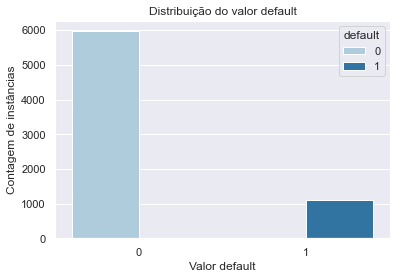

In [10]:
print('Porcentagem de valores default:',end='\n\n')
print(dados.default.value_counts(normalize=True)*100,end='\n\n')    # Predominância de adimplentes sobre inadimplentes na base de dados (em %)

# Visualização
plot = srn.countplot(data=dados, x='default',hue="default",palette='Paired')
srn.set(rc={'figure.figsize':(4,2)})
_ = plot.set(title='Distribuição do valor default',
             xlabel='Valor default',
             ylabel='Contagem de instâncias')

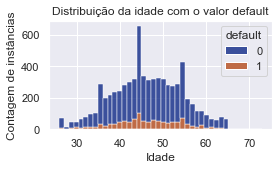

In [11]:
# Distribuição da idade conforme default

# Visualização
plot = srn.histplot(data=dados, x='idade',hue="default",palette='dark',stat='count',multiple="stack")
srn.set(rc={'figure.figsize':(12,6)})
_ = plot.set(title='Distribuição da idade com o valor default',
             xlabel='Idade',
             ylabel='Contagem de instâncias')



Porcentagem de sexo:

M    52.337241
F    47.662759
Name: sexo, dtype: float64



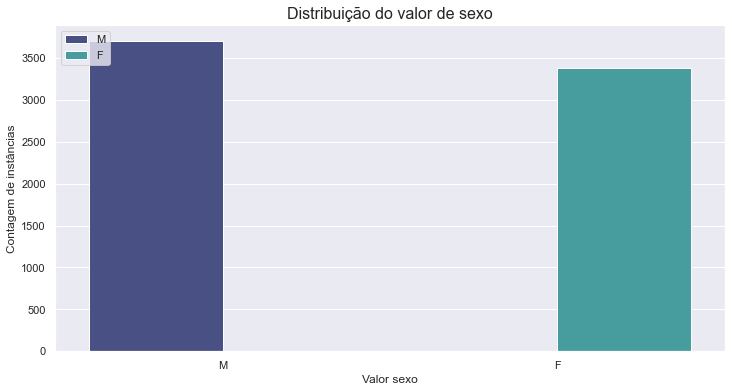

In [12]:
print('Porcentagem de sexo:',end='\n\n')
print(dados.sexo.value_counts(normalize=True)*100,end='\n\n')    # Predominância de adimplentes sobre inadimplentes na base de dados (em %)

# Visualização
plot = srn.countplot(data=dados, x='sexo',hue="sexo",palette='mako')
srn.set(rc={'figure.figsize':(7,5.5)})
_ = plot.set(xlabel='Valor sexo',
             ylabel='Contagem de instâncias')
plt.title('Distribuição do valor de sexo', size=16)
plt.legend(loc='upper left')
plt.show()

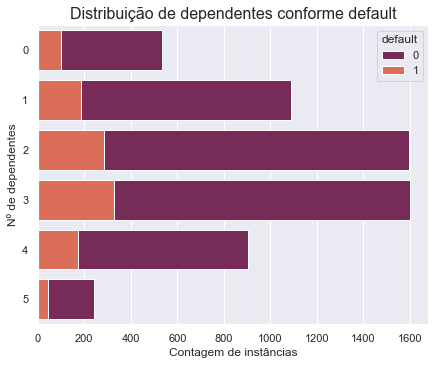

In [13]:
# Distribuição de dependentes conforme default

# Visualização
plot = srn.countplot(data=dados, y='dependentes',hue="default",palette='rocket',dodge=False)
srn.set(rc={'figure.figsize':(8,6)})
_ = plot.set(ylabel='Nº de dependentes',
             xlabel='Contagem de instâncias')
plt.title('Distribuição de dependentes conforme default', size=16)
plt.show()

Porcentagem de cada escolaridade no dataset:

mestrado               36.590877
ensino medio           23.344160
sem educacao formal    17.003248
graduacao              11.919220
doutorado              11.142494
Name: escolaridade, dtype: float64



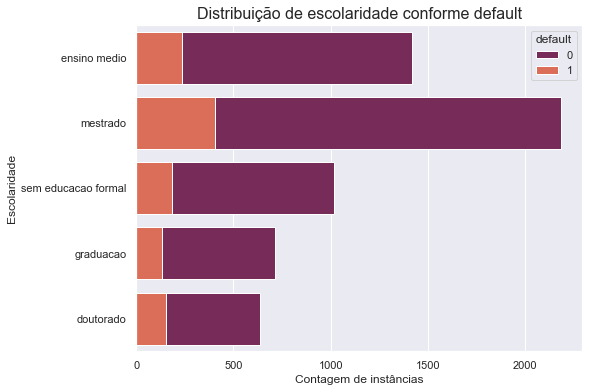

In [14]:
# Distribuição de escolaridade conforme default
print('Porcentagem de cada escolaridade no dataset:', end='\n\n')
print(dados['escolaridade'].value_counts(dropna=False,normalize=True)*100, end='\n\n')


# Visualização
plot = srn.countplot(data=dados, y='escolaridade',hue="default",palette='rocket',dodge=False)
srn.set(rc={'figure.figsize':(8,6)})
_ = plot.set(ylabel='Escolaridade',
             xlabel='Contagem de instâncias')
plt.title('Distribuição de escolaridade conforme default', size=16)
plt.show()

Porcentagem de valores default = 1 para cada estado civil

casado        0.148429
solteiro      0.166893
divorciado    0.161687
Name: estado_civil, dtype: float64



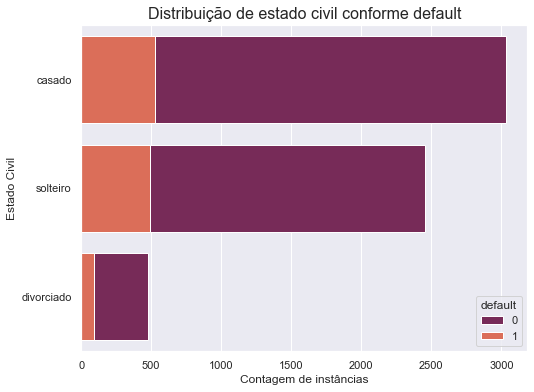

In [15]:
# Distribuição do estado civil
print('Porcentagem de valores default = 1 para cada estado civil', end='\n\n')
print(dados[dados['default'] == 1]['estado_civil'].value_counts(dropna=False)/dados['estado_civil'].value_counts(dropna=False), end='\n\n')

# Visualização
plot = srn.countplot(data=dados, y='estado_civil',hue="default",palette='rocket',dodge=False)
srn.set(rc={'figure.figsize':(8,6)})
_ = plot.set(ylabel='Estado Civil',
             xlabel='Contagem de instâncias')
plt.title('Distribuição de estado civil conforme default', size=16)
plt.show()

Podemos ver que mesmo havendo um maior número de casa do que solteiros, os solteiros apresentam o mesmo numero de inadimplentes que os casados, mas proporcionalmente parece que todos os grupos apresentam uma porcentagem de inadimplentes muito próxima.

Porcentagem de valores default = 1 para cada salário anual

menos que $40K    0.169413
$40K - $60K       0.144476
$80K - $120K      0.157238
$60K - $80K       0.131460
$120K +           0.178322
Name: salario_anual, dtype: float64



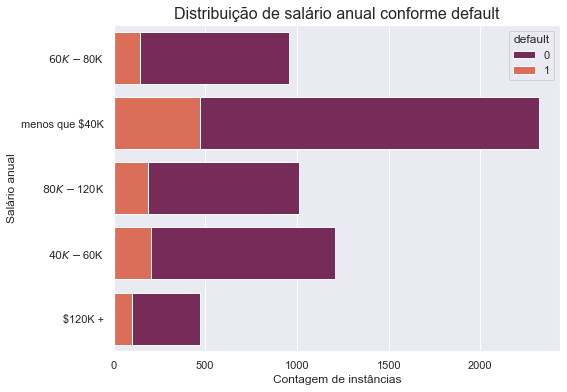

In [16]:
# Distribuição do salário anual
print('Porcentagem de valores default = 1 para cada salário anual', end='\n\n')
print(dados[dados['default'] == 1]['salario_anual'].value_counts(dropna=False)/dados['salario_anual'].value_counts(dropna=False), end='\n\n')

# Visualização
plot = srn.countplot(data=dados, y='salario_anual',hue="default",palette='rocket',dodge=False)
srn.set(rc={'figure.figsize':(8,6)})
_ = plot.set(ylabel='Salário anual',
             xlabel='Contagem de instâncias')
plt.title('Distribuição de salário anual conforme default', size=16)
plt.show()

Podemos ver que o salário anual 80K - 120K apresenta a menor proporção de inadimplentes.

Porcentagem de valores default = 1 para cada tipo de cartão

blue        0.156714
silver      0.161125
gold        0.160494
platinum    0.272727
Name: tipo_cartao, dtype: float64



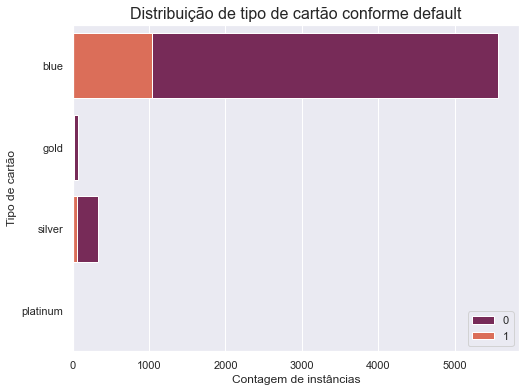

In [17]:
# Distribuição do tipo de cartão
print('Porcentagem de valores default = 1 para cada tipo de cartão', end='\n\n')
print(dados[dados['default'] == 1]['tipo_cartao'].value_counts(dropna=False)/dados['tipo_cartao'].value_counts(dropna=False), end='\n\n')

# Visualização
plot = srn.countplot(data=dados, y='tipo_cartao',hue="default",palette='rocket',dodge=False)
srn.set(rc={'figure.figsize':(8,6)})
_ = plot.set(ylabel='Tipo de cartão',
             xlabel='Contagem de instâncias')
plt.title('Distribuição de tipo de cartão conforme default', size=16)
plt.legend(loc='lower right')
plt.show()

Temos uma maior proporção de valores default = 1 para cartões platinum, porém, temos uma proporção muito pequena de cartões platinum e também de cartões gold.

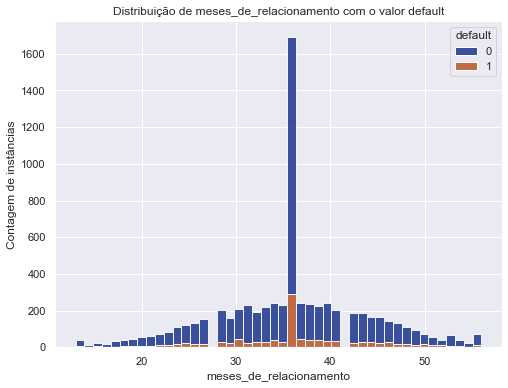

In [18]:
# Distribuição dos meses_de_relacionamento conforme default

# Visualização
plot = srn.histplot(data=dados, x='meses_de_relacionamento',hue="default",palette='dark',stat='count',multiple="stack")
srn.set(rc={'figure.figsize':(12,6)})
_ = plot.set(title='Distribuição de meses_de_relacionamento com o valor default',
             xlabel='meses_de_relacionamento',
             ylabel='Contagem de instâncias')



In [22]:
print("Ranking de meses_de_relacionamento (top 10):")
dados.meses_de_relacionamento.value_counts().head(10)

Ranking de meses_de_relacionamento (top 10):


36    1693
37     242
34     239
40     239
38     238
35     233
31     228
39     224
33     221
30     208
Name: meses_de_relacionamento, dtype: int64

Vemos que a idade 36 tem um número muito maior de instâncias do que os outros meses de relacionamento.

Porcentagem de valores default = 1 para cada qtd_produtos

1    0.251994
2    0.278302
3    0.171305
4    0.104444
5    0.117388
6    0.110502
Name: qtd_produtos, dtype: float64



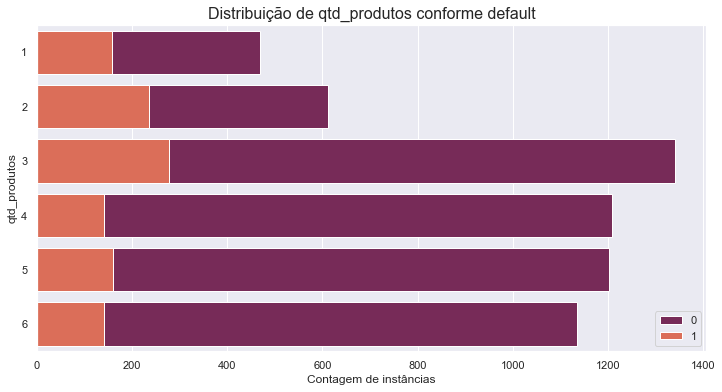

In [23]:
# Distribuição da qtd_produtos conforme default
print('Porcentagem de valores default = 1 para cada qtd_produtos', end='\n\n')
print(dados[dados['default'] == 1]['qtd_produtos'].value_counts(dropna=False)/dados['qtd_produtos'].value_counts(dropna=False), end='\n\n')


# Visualização
plot = srn.countplot(data=dados, y='qtd_produtos',hue="default",palette='rocket',dodge=False)
srn.set(rc={'figure.figsize':(8,6)})
_ = plot.set(ylabel='qtd_produtos',
             xlabel='Contagem de instâncias')
plt.title('Distribuição de qtd_produtos conforme default', size=16)
plt.legend(loc='lower right')
plt.show()

Vemos que instâncias com 1, 2 e 3 produtos apresentam uma maior proporção de inadimplentes.

Porcentagem de valores default = 1 para cada iteracoes_12m

0    0.017361
1    0.077745
2    0.119331
3    0.199235
4    0.219836
5    0.328244
6    1.000000
Name: iteracoes_12m, dtype: float64



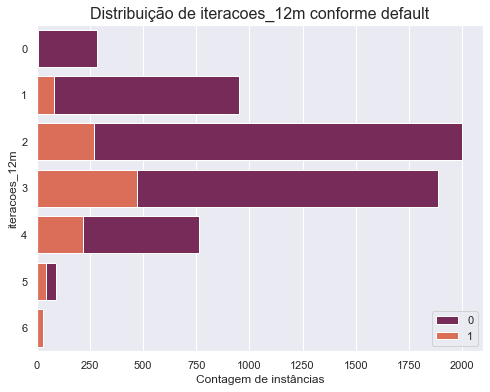

In [24]:
# Distribuição da iteracoes_12m conforme default
print('Porcentagem de valores default = 1 para cada iteracoes_12m', end='\n\n')
print(dados[dados['default'] == 1]['iteracoes_12m'].value_counts(dropna=False)/dados['iteracoes_12m'].value_counts(dropna=False), end='\n\n')


# Visualização
plot = srn.countplot(data=dados, y='iteracoes_12m',hue="default",palette='rocket',dodge=False)
srn.set(rc={'figure.figsize':(8,6)})
_ = plot.set(ylabel='iteracoes_12m',
             xlabel='Contagem de instâncias')
plt.title('Distribuição de iteracoes_12m conforme default', size=16)
plt.legend(loc='lower right')
plt.show()


Uma primeira hipótese poderia ser de que quanto maior o número de interações maior a porcentagem de inadimplência, porém, deve-se considerar de que havendo inadimplência o provedor de crádito conversará mais com o cliente para que o pagamento seja feito e quando você é um bom pagador, a probabilidade de uma iteração é menor.

Porcentagem de valores default = 1 para cada meses_inativo_12m

0    0.473684
1    0.042623
2    0.150000
3    0.209251
4    0.304498
5    0.170543
6    0.146667
Name: meses_inativo_12m, dtype: float64



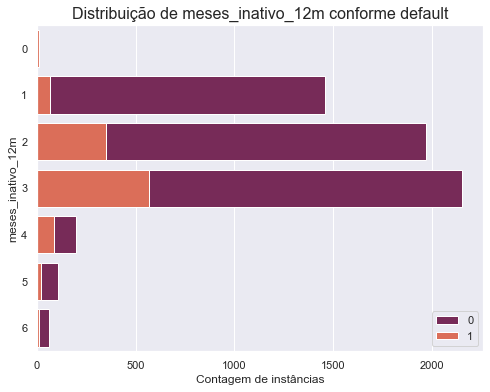

In [25]:
# Distribuição da meses_inativo_12m conforme default
print('Porcentagem de valores default = 1 para cada meses_inativo_12m', end='\n\n')
print(dados[dados['default'] == 1]['meses_inativo_12m'].value_counts(dropna=False)/dados['meses_inativo_12m'].value_counts(dropna=False), end='\n\n')


# Visualização
plot = srn.countplot(data=dados, y='meses_inativo_12m',hue="default",palette='rocket',dodge=False)
srn.set(rc={'figure.figsize':(8,6)})
_ = plot.set(ylabel='meses_inativo_12m',
             xlabel='Contagem de instâncias')
plt.title('Distribuição de meses_inativo_12m conforme default', size=16)
plt.legend(loc='lower right')
plt.show()


count     7081.000000
mean      8493.259524
std       9126.082105
min       1438.000000
25%       2498.350000
50%       4287.220000
75%      10729.400000
max      34516.990000
Name: limite_credito, dtype: float64


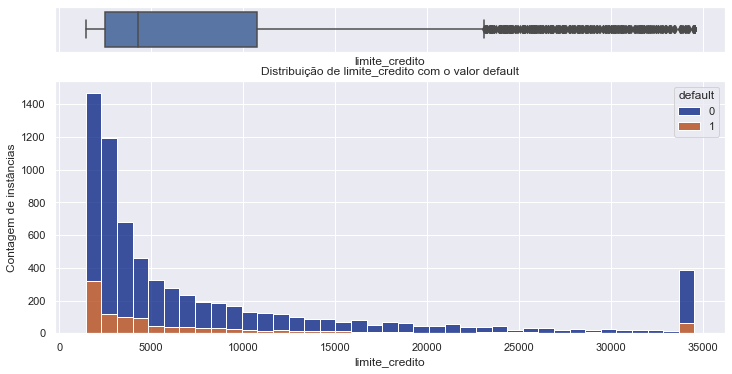

In [36]:
# Distribuição da limite_credito conforme default
print(dados["limite_credito"].describe().T)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
srn.boxplot(x=dados["limite_credito"], ax=ax_box)
plot = srn.histplot(data=dados, x='limite_credito',hue="default",palette='dark',stat='count',multiple="stack")
srn.set(rc={'figure.figsize':(12,6)})
_ = plot.set(title='Distribuição de limite_credito com o valor default',
             xlabel='limite_credito',
             ylabel='Contagem de instâncias')


Vemos que existe uma distribuição com muitas pessoas com pouco limite de crédito e conforme o limite aumenta, menos pessoas tem, porém, temos um acúmulo de pessoas com o maior limite de crédito (~R$ 3500,00).

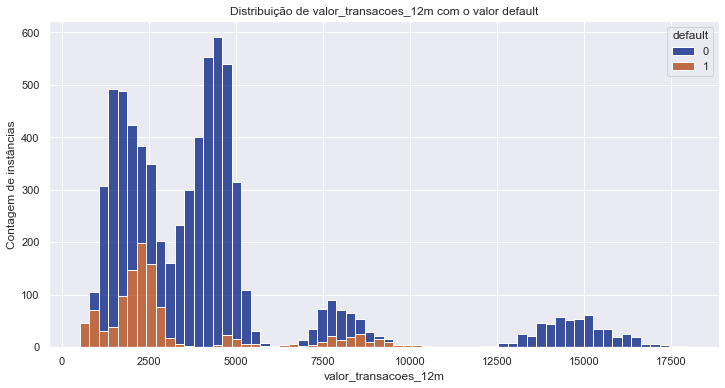

In [42]:
# Distribuição da valor_transacoes_12m conforme default
plot = srn.histplot(data=dados, x='valor_transacoes_12m',hue="default",palette='dark',stat='count',multiple="stack")
srn.set(rc={'figure.figsize':(12,6)})
_ = plot.set(title='Distribuição de valor_transacoes_12m com o valor default',
             xlabel='valor_transacoes_12m',
             ylabel='Contagem de instâncias')

Podemos ver 3 grupos distintos de distribuição de valores de transações, cada um com default=1 diferentes e há um acumulo de valores para o primeiro grupo, que tem valores de transações menores.

### 4.1 Atributos categóricos

In [44]:
dados.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,7081,2,M,3706
escolaridade,7081,5,mestrado,2591
estado_civil,7081,3,casado,3564
salario_anual,7081,5,menos que $40K,2792
tipo_cartao,7081,4,blue,6598


### 4.2 Atributos numéricos

In [46]:
dados.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,7081.0,0.157181,0.363997,0.00,0.00,0.00,0.00,1.00
idade,7081.0,46.347691,8.041225,26.00,41.00,46.00,52.00,73.00
dependentes,7081.0,2.337805,1.291649,0.00,1.00,2.00,3.00,5.00
meses_de_relacionamento,7081.0,35.981359,8.002609,13.00,31.00,36.00,40.00,56.00
qtd_produtos,7081.0,3.819376,1.544444,1.00,3.00,4.00,5.00,6.00
iteracoes_12m,7081.0,2.454456,1.104917,0.00,2.00,2.00,3.00,6.00
meses_inativo_12m,7081.0,2.342607,0.995104,0.00,2.00,2.00,3.00,6.00
limite_credito,7081.0,8493.259524,9126.082105,1438.00,2498.35,4287.22,10729.40,34516.99
valor_transacoes_12m,7081.0,4394.800669,3468.457771,510.16,2089.63,3831.09,4740.51,17995.49
qtd_transacoes_12m,7081.0,64.503319,23.809330,10.00,44.00,67.00,80.00,134.00


### 4.3 Análise de pares

Outra análise de nosso interesse é a investigação da relação entre as variáveis.

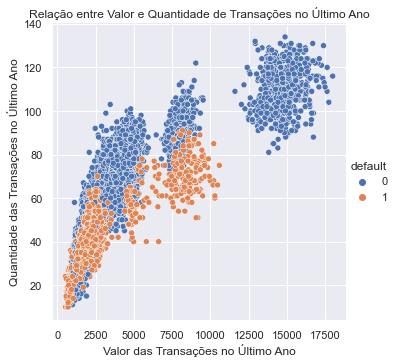

In [49]:
# Valor de Transações nosÚltimos 12 meses x Quantidade de Transações nos Últimos 12 meses
f = srn.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=dados, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

Nessa visualização vemos que os três grupos de `valor_transacoes_12m` encontrado anteriormente também tem uma relação coma quantidade de transações, ou seja, quanto menor o valor das transações, menor a quantidade delas, além disso, vemos a predominância de instâncias inadimplentes para menores valores.